# Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark")
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

# Constants

In [2]:
TRAIN_FILE_ORIG=os.path.join(Path(os.getcwd()).parent,'data','training','original','train.csv')

# Load the training dataset

In [3]:
train_df = pd.read_csv(TRAIN_FILE_ORIG)
train_df.info()
train_df.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   float64
 5   standard_error  2834 non-null   float64
dtypes: float64(2), object(4)
memory usage: 133.0+ KB


,id,url_legal,license,excerpt,target,standard_error
766,5c0dd7800,https://kids.frontiersin.org/article/10.3389/f...,CC BY 4.0,You have probably realized that languages chan...,0.171553,0.480882


In [4]:
print("One example of excerpt:\n",train_df.iloc[5]['excerpt'])
print("The target of above excerpt is: ", train_df.iloc[5]['target'])
print("The standard deviation of the target is: ",train_df.iloc[5]['standard_error'])

One example of excerpt:
 Hal and Chester found ample time to take an inventory of the general's car. It was a huge machine, and besides being fitted up luxuriously was also furnished as an office, that the general might still be at work while he hurried from one part of the field to another when events demanded his immediate presence. Even now, with treachery threatening, and whirling along at a terrific speed, General Joffre, probably because of habit, fell to work sorting papers, studying maps and other drawings.
For almost two hours the car whirled along at top speed, and at length pulled up in the rear of an immense body of troops, who, even to Hal and Chester, could be seen preparing for an advance. General Joffre was out of the car before it came to a full stop, and Hal and Chester were at his heels. An orderly approached.
"My respects to General Tromp, and tell him I desire his presence immediately," ordered General Joffre.
The target of above excerpt is:  -0.861808583
The stand

# EDA

The minimum of the target is -3.676267773, the maximum of the target is 1.711389827


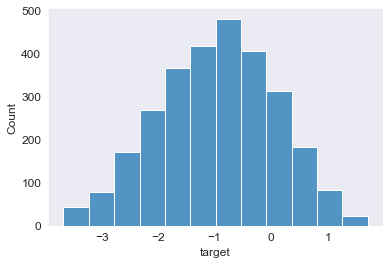

In [6]:
min_target=train_df['target'].min()
max_target=train_df['target'].max()
print(f'The minimum of the target is {min_target}, the maximum of the target is {max_target}')
sns.histplot(train_df['target'],bins=12)
plt.show()

The average word count is 172.98200423429782, The std of the word count is 16.971395277426357


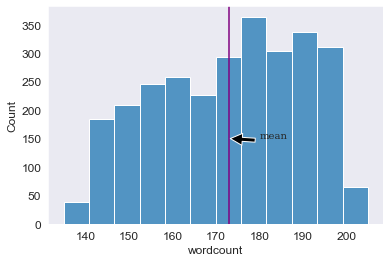

In [7]:
train_df['wordcount']=train_df['excerpt'].str.split().apply(len)
count_mean=np.mean(train_df['wordcount'])
count_std=np.std(train_df['wordcount'])
print(f"The average word count is {count_mean}, The std of the word count is {count_std}")
fig,ax=plt.subplots()
sns.histplot(train_df['wordcount'],bins=12)
ax.axvline(count_mean,color='purple')
ax.annotate('mean', xy=(173,150),xytext=(180, 150), font='Serif',arrowprops=dict(facecolor='black', shrink=0.05),)
plt.show()

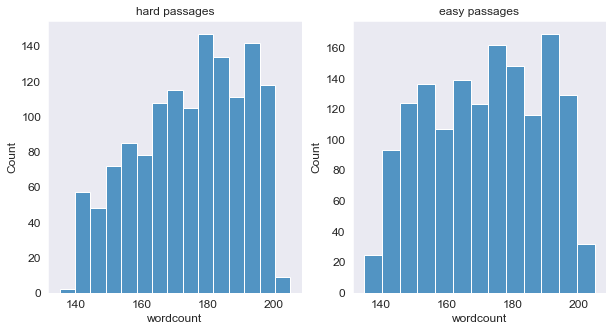

In [8]:
hard_df=train_df[train_df['target']<-1]
easy_df=train_df[train_df['target']>-1]
fig,ax=plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=hard_df['wordcount'],ax=ax[0])
ax[0].set_title("hard passages")
sns.histplot(data=easy_df['wordcount'], ax=ax[1])
ax[1].set_title('easy passages')
plt.show()


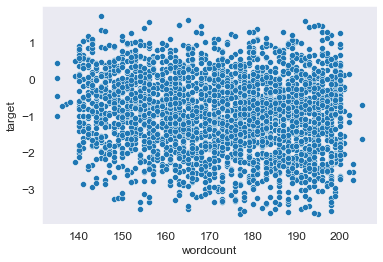

In [9]:
sns.scatterplot(x=train_df['wordcount'],y=train_df['target'])
plt.show()

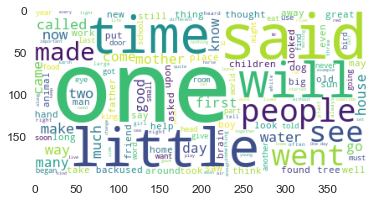

In [10]:
wc=WordCloud(stopwords=STOPWORDS,max_words=150,background_color='white')
wc.generate(' '.join(easy_df['excerpt']))
plt.imshow(wc)
plt.show()

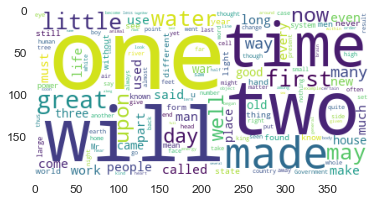

In [11]:
wc=WordCloud(stopwords=STOPWORDS,max_words=150,background_color='white')
wc.generate(' '.join(hard_df['excerpt']))
plt.imshow(wc)
plt.show()